# Intro to NLTK

A whirlwind tour of Python's natural language toolkit (NLTK).

We'll start by importing a few libraries and opening up a sample text file: Jane Austen's Pride and Prejudice.

If you get import errors, use `pip` to install the missing package (`pip install package_name`).

In [2]:
import nltk
import urllib
from nltk.corpus import gutenberg
from nltk.text import Text

pride_prejudice = urllib.request.urlopen("https://cogs219.github.io/data/pride_prejudice.txt").read().decode()

In [3]:
print(pride_prejudice[0:500])


PRIDE AND PREJUDICE

By Jane Austen



Chapter 1


It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.

However little known the feelings or views of such a man may be on his
first entering a neighbourhood, this truth is so well fixed in the minds
of the surrounding families, that he is considered the rightful property
of some one or other of their daughters.

"My dear Mr. Bennet," said his lady to him one day, "h


Now let's tokenize and lowercase the text.

In [ ]:
#run the download command once
#nltk.download('punkt_tab')
pride_prejudice_raw_tokens = nltk.word_tokenize(pride_prejudice)
print( "Original tokens (first 100):")
print(pride_prejudice_raw_tokens[:100])

#lowercase 
pride_prejudice_raw_tokens = [token.lower() for token in pride_prejudice_raw_tokens]
print( "Lowercased tokens (first 100):")
print( pride_prejudice_raw_tokens[:100])


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/martincz/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Original tokens (first 100):
['PRIDE', 'AND', 'PREJUDICE', 'By', 'Jane', 'Austen', 'Chapter', '1', 'It', 'is', 'a', 'truth', 'universally', 'acknowledged', ',', 'that', 'a', 'single', 'man', 'in', 'possession', 'of', 'a', 'good', 'fortune', ',', 'must', 'be', 'in', 'want', 'of', 'a', 'wife', '.', 'However', 'little', 'known', 'the', 'feelings', 'or', 'views', 'of', 'such', 'a', 'man', 'may', 'be', 'on', 'his', 'first', 'entering', 'a', 'neighbourhood', ',', 'this', 'truth', 'is', 'so', 'well', 'fixed', 'in', 'the', 'minds', 'of', 'the', 'surrounding', 'families', ',', 'that', 'he', 'is', 'considered', 'the', 'rightful', 'property', 'of', 'some', 'one', 'or', 'other', 'of', 'their', 'daughters', '.', '``', 'My', 'dear', 'Mr.', 'Bennet', ',', "''", 'said', 'his', 'lady', 'to', 'him', 'one', 'day', ',', '``']
Lowercased tokens (first 100):
['pride', 'and', 'prejudice', 'by', 'jane', 'austen', 'chapter', '1', 'it', 'is', 'a', 'truth', 'universally', 'acknowledged', ',', 'that', 'a', 'singl

Now let's remove punctuation

In [16]:
pride_prejudice_clean_tokens = [token.lower() for token in pride_prejudice_raw_tokens if token.isalpha()]
print( "Clean yokens (first 100). Now without punctuation:")
print(pride_prejudice_clean_tokens[:100])


Clean yokens (first 100). Now without punctuation:
['pride', 'and', 'prejudice', 'by', 'jane', 'austen', 'chapter', 'it', 'is', 'a', 'truth', 'universally', 'acknowledged', 'that', 'a', 'single', 'man', 'in', 'possession', 'of', 'a', 'good', 'fortune', 'must', 'be', 'in', 'want', 'of', 'a', 'wife', 'however', 'little', 'known', 'the', 'feelings', 'or', 'views', 'of', 'such', 'a', 'man', 'may', 'be', 'on', 'his', 'first', 'entering', 'a', 'neighbourhood', 'this', 'truth', 'is', 'so', 'well', 'fixed', 'in', 'the', 'minds', 'of', 'the', 'surrounding', 'families', 'that', 'he', 'is', 'considered', 'the', 'rightful', 'property', 'of', 'some', 'one', 'or', 'other', 'of', 'their', 'daughters', 'my', 'dear', 'bennet', 'said', 'his', 'lady', 'to', 'him', 'one', 'day', 'have', 'you', 'heard', 'that', 'netherfield', 'park', 'is', 'let', 'at', 'last', 'bennet', 'replied', 'that']


## Frequency Distributions

The first thing we'll do is build a frequency distribution using `nltk.FreqDist()`


In [21]:
pride_prejudice_freq_dist = nltk.FreqDist(pride_prejudice_clean_tokens)

`pride_prejudice_freq_dist` is formatted as a Python dictionary -- nothing special here, but the nice thing is that FreqDist implements various methods we can use to compute and quickly plot various properties of the text.

In [22]:
pride_prejudice_freq_dist

FreqDist({'the': 4331, 'to': 4137, 'of': 3608, 'and': 3578, 'her': 2203, 'i': 2065, 'a': 1947, 'in': 1865, 'was': 1844, 'she': 1695, ...})

How many tokens are there?

`.N()` gives us the total number of words -- the tokens. (N standa for Number)

`.B()` gives us the number of unique words -- the types. (B stands for Bins)


Token count: 120033
Type count: 6191
Occurences of 'darcy': 417
Occurences of 'love': 91
Occurences of 'money': 26
Tokens that end in -ed: 4947
Types that end in -ed: 860


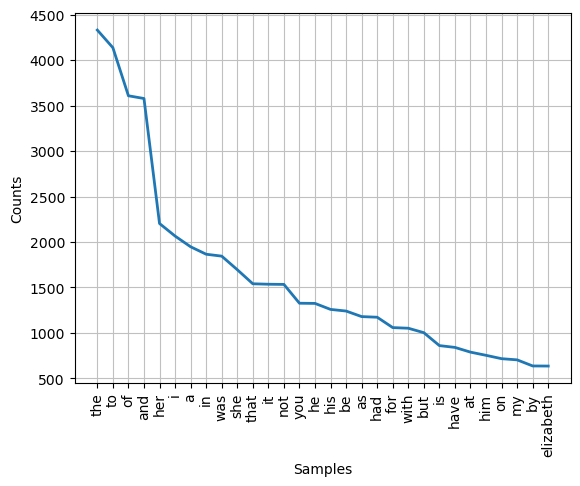

In [25]:
print ("Token count:", pride_prejudice_freq_dist.N())
print ("Type count:", pride_prejudice_freq_dist.B())

# We can get the frequency of a word by treating the FreqDist as a dictionary and looking up a word
print ("Occurences of 'darcy':", pride_prejudice_freq_dist['darcy'])
print ("Occurences of 'love':", pride_prejudice_freq_dist['love'])
print ("Occurences of 'money':", pride_prejudice_freq_dist['money'])

# Find out how many tokens end in -ed
# We just ask for the length of the list of tokens
# that end in -ed
print( "Tokens that end in -ed:", len([token for token in pride_prejudice_clean_tokens if token.endswith('ed')]))

# If we want the number of types, we can use the keys of the
# FreqDist
print ("Types that end in -ed:", len([word_type for word_type in pride_prejudice_freq_dist if word_type.endswith('ed')]))

pride_prejudice_freq_dist.plot(30)

## Removing stop words

Stop words is jargon for very frequent words that tend to be not very informative as to the meaning of the text. For example, we can't learn much about an English text from knowing that it has the words "a", "the", and "to" in it...  These frequent words dominate frequency distributions and so are often removed as part of pre-processing. NLTK has a collection of stop-words for English (other languages too!)

In [ ]:
#run the download command once
#nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))


#remove them
pride_prejudice_clean_tokens_no_stop_words = [word for word in pride_prejudice_clean_tokens if word not in stopwords.words('english')]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/martincz/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

### A detour into runtime considerations
Notice that removing stop-words from just a single book took on the order of 10 seconds (!). Why is that?
Suppose we want to process a 1000 books. At this rate, we're talking about nearly 3 hours of run-time! That seems wildly inefficient. What's going on? Take a little bit of time and figure out a much faster way of doing this. Removing stopwrds in this way will decrease your runtime drastically.

Let's get the frequency distribution of words with the stop words removed:



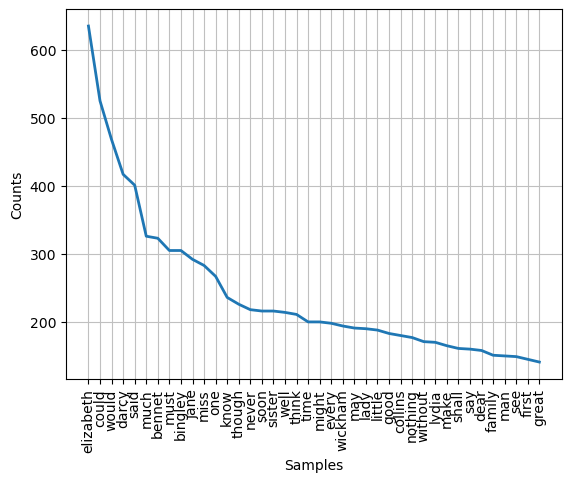

In [29]:
pride_prejudice_clean_tokens_no_stop_words_fd =  nltk.FreqDist(pride_prejudice_clean_tokens_no_stop_words)
pride_prejudice_clean_tokens_no_stop_words_fd.plot(40)


A handy method inside FreqDist is `most_common`:

In [30]:
pride_prejudice_clean_tokens_no_stop_words_fd.most_common(10)


[('elizabeth', 635),
 ('could', 525),
 ('would', 468),
 ('darcy', 417),
 ('said', 401),
 ('much', 326),
 ('bennet', 323),
 ('must', 305),
 ('bingley', 305),
 ('jane', 292)]

## Concordances

Concordances are the context in which a word is used. To calculate these, we can use NLTK's [Text module](https://www.nltk.org/api/nltk.text.html)

In [33]:
print(Text(pride_prejudice_raw_tokens).concordance("picture"))


Displaying 12 of 12 matches:
t not doing its office . '' `` your picture may be very exact , louisa , '' sai
nt lines . as for your elizabeth 's picture , you must not have it taken , for 
 mr. collins was a most humiliating picture ! and to the pang of a friend disgr
nd obliging . it was mr. collins 's picture of hunsford and rosings rationally 
 elizabeth laughed heartily at this picture of herself , and said to colonel fi
 ; but it appeared to her so just a picture of mr. darcy , that she would not t
er aunt now called her to look at a picture . she approached and saw the likene
me forward , and told them it was a picture of a young gentleman , the son of h
said mrs. gardiner , looking at the picture ; `` it is a handsome face . but , 
tairs you will see a finer , larger picture of him than this . this room was my
he stood several minutes before the picture , in earnest contemplation , and re
earance , or his resemblance to the picture they had just been examining , been
None


## N-grams and their frequencies

N-grams are word sequences of n-length. For example, 2-grams (typically called bigrams) are 2 word combinations (e.g., they have, I was, red ball) that occur in a text. 3-grams (trigrams) are all the 3-word combinations. To compute them, use nltk's bigram and trigram modules


In [37]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams, trigrams

#compute bigrams and their frequencies
bigram_freqs = nltk.FreqDist(nltk.bigrams(pride_prejudice_clean_tokens_no_stop_words))

bigram_freqs.most_common(20)




[(('lady', 'catherine'), 115),
 (('miss', 'bingley'), 87),
 (('miss', 'bennet'), 65),
 (('said', 'elizabeth'), 45),
 (('sir', 'william'), 44),
 (('miss', 'darcy'), 39),
 (('de', 'bourgh'), 39),
 (('young', 'man'), 38),
 (('dare', 'say'), 31),
 (('colonel', 'fitzwilliam'), 30),
 (('colonel', 'forster'), 28),
 (('elizabeth', 'could'), 26),
 (('said', 'bennet'), 25),
 (('young', 'ladies'), 25),
 (('miss', 'lucas'), 25),
 (('cried', 'elizabeth'), 24),
 (('great', 'deal'), 23),
 (('uncle', 'aunt'), 23),
 (('went', 'away'), 21),
 (('could', 'help'), 20)]

We can also look at trigrams, but with just a single book this is not going to be very effective. Notice that even the most frequent trigrams aren't observed very often!

```{note}
To compute n-grams beyond 3, you can use nltk.ngrams, but for small corpora like those of a book (or even a 100 books), you'll find that the vast majority will only occur once, and so there's nothing to work with... 
``` 

In [45]:

trigram_freqs = nltk.FreqDist(nltk.trigrams(pride_prejudice_clean_tokens_no_stop_words))
print(trigram_freqs.most_common(20))




[(('miss', 'de', 'bourgh'), 20), (('lady', 'catherine', 'de'), 14), (('catherine', 'de', 'bourgh'), 14), (('sir', 'william', 'lucas'), 10), (('said', 'miss', 'bingley'), 10), (('hurst', 'miss', 'bingley'), 9), (('lady', 'catherine', 'daughter'), 8), (('ten', 'thousand', 'pounds'), 6), (('miss', 'elizabeth', 'bennet'), 5), (('ten', 'thousand', 'year'), 4), (('dear', 'said', 'bennet'), 4), (('miss', 'bennet', 'came'), 4), (('may', 'depend', 'upon'), 4), (('could', 'think', 'nothing'), 4), (('elizabeth', 'could', 'help'), 4), (('elizabeth', 'made', 'answer'), 4), (('could', 'think', 'without'), 4), (('without', 'saying', 'word'), 4), (('lady', 'catherine', 'seemed'), 4), (('since', 'went', 'away'), 4)]


Let's look at the most frequent trigrams in a slightly larger corpus: NLTK's Project Gutenberg. Project Gutenberg contains the text of many out-of-copyright books and you can download all of them. NLTK bundles a handful: 

In [52]:
nltk.download('gutenberg')
print(nltk.corpus.gutenberg.fileids())


['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/martincz/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


Any idea what the most common trigrams are if we combine all of these books into a single corpus?

In [58]:

some_books = nltk.corpus.gutenberg.words()

some_books_clean = [token.lower() for token in some_books if token.isalpha()]
trigram_freqs = nltk.FreqDist(nltk.trigrams(some_books_clean))
print(trigram_freqs.most_common(30))



[(('of', 'the', 'lord'), 1780), (('the', 'son', 'of'), 1466), (('the', 'children', 'of'), 1368), (('out', 'of', 'the'), 1202), (('the', 'house', 'of'), 917), (('saith', 'the', 'lord'), 854), (('the', 'lord', 'and'), 818), (('and', 'i', 'will'), 764), (('and', 'all', 'the'), 697), (('children', 'of', 'israel'), 647), (('the', 'land', 'of'), 626), (('the', 'sons', 'of'), 574), (('and', 'the', 'lord'), 572), (('and', 'he', 'said'), 526), (('unto', 'the', 'lord'), 510), (('the', 'king', 'of'), 500), (('the', 'lord', 'god'), 481), (('it', 'came', 'to'), 474), (('came', 'to', 'pass'), 461), (('said', 'unto', 'him'), 454), (('of', 'the', 'house'), 435), (('thus', 'saith', 'the'), 430), (('and', 'they', 'shall'), 427), (('and', 'thou', 'shalt'), 422), (('one', 'of', 'the'), 419), (('the', 'hand', 'of'), 409), (('the', 'name', 'of'), 407), (('of', 'the', 'earth'), 404), (('and', 'it', 'came'), 400), (('and', 'in', 'the'), 397)]


## Collocations

Bigrams and trigrams are simply all the pairs (and triplets) of words that occur sequentially. The most frequent ones are... more frequent, but part of the reason they're more frequent is that their *individual* words are more frequent. 

Here's an example of getting collocations -- combinations of words that are unlikely to appear together, but do (and so are important). 
(more and more complex examples [here](https://www.nltk.org/howto/collocations.html))

In [63]:
Text(pride_prejudice_clean_tokens_no_stop_words).collocation_list()

[('lady', 'catherine'),
 ('sir', 'william'),
 ('miss', 'bingley'),
 ('colonel', 'fitzwilliam'),
 ('miss', 'bennet'),
 ('colonel', 'forster'),
 ('dare', 'say'),
 ('young', 'man'),
 ('thousand', 'pounds'),
 ('great', 'deal'),
 ('uncle', 'aunt'),
 ('young', 'ladies'),
 ('went', 'away'),
 ('miss', 'lucas'),
 ('next', 'morning'),
 ('miss', 'darcy'),
 ('depend', 'upon'),
 ('gracechurch', 'street'),
 ('made', 'answer'),
 ('soon', 'afterwards')]

Let's compare it to the collocations from Alice in Wonderland. We'll tokenize in a slightly different way here, as an added example.

In [67]:
alice_raw = nltk.corpus.gutenberg.raw('carroll-alice.txt')

alice_tokenizer = nltk.tokenize.RegexpTokenizer('\w+') #can put in whatever regexp you want here
alice_tokenized = alice_tokenizer.tokenize(alice_raw)
alice_tokenized = [token.lower() for token in alice_tokenized if token not in stopwords.words('english')]

alice_clean =  [token.lower() for token in alice_tokenized if token not in stopwords.words('english')]

Text(alice_clean).collocation_list()


[('mock', 'turtle'),
 ('march', 'hare'),
 ('said', 'alice'),
 ('white', 'rabbit'),
 ('join', 'dance'),
 ('soo', 'oop'),
 ('minute', 'two'),
 ('said', 'king'),
 ('beg', 'pardon'),
 ('beautiful', 'soup'),
 ('thought', 'alice'),
 ('bread', 'butter'),
 ('golden', 'key'),
 ('said', 'caterpillar'),
 ('set', 'work'),
 ('kid', 'gloves'),
 ('said', 'hatter'),
 ('beau', 'ootiful'),
 ('mary', 'ann'),
 ('yer', 'honour')]

If we compare the collocations to the most common bigrams, we see that the collocations are more informative.

In [70]:
nltk.FreqDist(nltk.bigrams(alice_clean)).most_common(30)


[(('said', 'alice'), 123),
 (('mock', 'turtle'), 56),
 (('march', 'hare'), 31),
 (('said', 'king'), 29),
 (('thought', 'alice'), 26),
 (('white', 'rabbit'), 22),
 (('said', 'hatter'), 22),
 (('said', 'mock'), 20),
 (('said', 'caterpillar'), 18),
 (('said', 'gryphon'), 18),
 (('alice', 'said'), 17),
 (('said', 'duchess'), 15),
 (('said', 'cat'), 14),
 (('alice', 'thought'), 13),
 (('said', 'queen'), 13),
 (('minute', 'two'), 12),
 (('poor', 'alice'), 11),
 (('alice', 'could'), 11),
 (('king', 'said'), 11),
 (('oh', 'dear'), 10),
 (('said', 'march'), 10),
 (('poor', 'little'), 9),
 (('might', 'well'), 9),
 (('alice', 'went'), 9),
 (('said', 'mouse'), 9),
 (('alice', 'replied'), 9),
 (('alice', 'looked'), 9),
 (('said', 'dormouse'), 9),
 (('join', 'dance'), 9),
 (('little', 'thing'), 8)]

## Lemmatization

A lemma is the base form of a word. It is what would typically be used as an entry in an English dictionary. Lemmatization refers to grouping together words that are inflectional variants of the same lemma: (go,went), (read, reading, reads), (cat, cats), etc..  

In [ ]:
#download wordnet on first run
#nltk.download('wordnet')
from nltk import WordNetLemmatizer

lemmatizer = nltk.WordNetLemmatizer()

print("cats :", lemmatizer.lemmatize("cats"))
print("corpora :", lemmatizer.lemmatize("corpora"))
print("says :", lemmatizer.lemmatize("says"))
print("went :", lemmatizer.lemmatize("went"))
print("leaves :", lemmatizer.lemmatize("leaves"))



cats : cat
corpora : corpus
says : say
went : went
leaves : leaf


Ok, so we can see a few problems here. First, went stayed as went. And "leaves" was matched to "leaf" whereas I was thinking of "leaves" as in a person leaves the room. The reason is that the WordNetLemmatizer has limitations. It defaults to treating words as nouns (with some exceptions). We can, however, pass it a part of speech as an argument:

```{note}
For the wordnet lemmatizer, the possible parts of speech are: n for noun, v for verb, a for adjective, r for adverb, s for satellite adjective
```

In [ ]:

print("went :", lemmatizer.lemmatize("went",pos="v"))
print("leaves :", lemmatizer.lemmatize("leaves",pos="v"))
print("redder :", lemmatizer.lemmatize("redder",pos="a"))



went : go
leaves : leave
redder : red


What use is lemmatization if we have to manually tell it what part of speech something is? Well, we don't have to do it *manually*. If we're processing words in context, we can use NLTK's [automatic Part of Speech Tagging](https://www.nltk.org/book/ch05.html) instead!  

## WordNet

NLTK has a handy [interface to WordNet](https://www.nltk.org/howto/wordnet.html). Here's an example of using it to automatically classify some animals into classe (mammals, birds, etc.). See [more examples here](https://www.nltk.org/howto/wordnet.html).


Let's import the wordnet module and look up some words.

In [75]:
from nltk.corpus import wordnet as wn

print(wn.synsets('table'))
print('\n')
print(wn.synsets('horse'))
print('\n')
print(wn.synsets('pressure'))
print('\n')
print(wn.synsets('take'))


[Synset('table.n.01'), Synset('table.n.02'), Synset('table.n.03'), Synset('mesa.n.01'), Synset('table.n.05'), Synset('board.n.04'), Synset('postpone.v.01'), Synset('table.v.02')]


[Synset('horse.n.01'), Synset('horse.n.02'), Synset('cavalry.n.01'), Synset('sawhorse.n.01'), Synset('knight.n.02'), Synset('horse.v.01')]


[Synset('pressure.n.01'), Synset('pressure.n.02'), Synset('press.n.09'), Synset('imperativeness.n.01'), Synset('pressure.n.05'), Synset('pressure.n.06'), Synset('atmospheric_pressure.n.01'), Synset('coerce.v.01'), Synset('blackmail.v.01')]


[Synset('return.n.06'), Synset('take.n.02'), Synset('take.v.01'), Synset('take.v.02'), Synset('lead.v.01'), Synset('take.v.04'), Synset('assume.v.03'), Synset('take.v.06'), Synset('bring.v.01'), Synset('take.v.08'), Synset('take.v.09'), Synset('choose.v.01'), Synset('accept.v.02'), Synset('fill.v.04'), Synset('consider.v.03'), Synset('necessitate.v.01'), Synset('take.v.15'), Synset('film.v.01'), Synset('remove.v.01'), Synset('consum

What is all this stuff? Each entry (synset) is a different sense of the word. We can look up specific synsets to see what they're about, e.g. let's iterate over the synsets for "table"

In [88]:

for cur_synset in wn.synsets('table'):
    print(cur_synset,cur_synset.definition())



Synset('table.n.01') a set of data arranged in rows and columns
Synset('table.n.02') a piece of furniture having a smooth flat top that is usually supported by one or more vertical legs
Synset('table.n.03') a piece of furniture with tableware for a meal laid out on it
Synset('mesa.n.01') flat tableland with steep edges
Synset('table.n.05') a company of people assembled at a table for a meal or game
Synset('board.n.04') food or meals in general
Synset('postpone.v.01') hold back to a later time
Synset('table.v.02') arrange or enter in tabular form


The "syn" part of "synset" stands for synonym. A key part of WordNet's organization is how it links word meanings (synsets) to word forms (lemmas).

In [97]:
for cur_synset in wn.synsets('alligator'):
    print(cur_synset,cur_synset.definition())


Synset('alligator.n.01') leather made from alligator's hide
Synset('alligator.n.02') either of two amphibious reptiles related to crocodiles but with shorter broader snouts
Synset('alligator.v.01') crack and acquire the appearance of alligator hide, as from weathering or improper application; of paint and varnishes


Notice that the second entry is not paper, but composition. What this means is that the second noun sense of "paper" has several lemmas. Let's confirm:   

In [105]:
print(wn.synset('paper.n.02').lemmas())


[Lemma('composition.n.08.composition'), Lemma('composition.n.08.paper'), Lemma('composition.n.08.report'), Lemma('composition.n.08.theme')]


These meanings are the same, but are parts of different synsets:

In [112]:
print(wn.synset('paper.n.02').definition())
print(wn.synset('composition.n.08').definition())



an essay (especially one written as an assignment)
an essay (especially one written as an assignment)


### Antonyms and entailments

In [118]:
print(wn.synset('high.a.01').lemmas()[0].antonyms())
print(wn.synset('rich.a.01').lemmas()[0].antonyms())

print(wn.synset('walk.v.01').entailments())
print(wn.synset('eat.v.01').entailments())


[Lemma('low.a.01.low')]
[Lemma('poor.a.02.poor')]
[Synset('step.v.01')]
[Synset('swallow.v.01'), Synset('chew.v.01')]


### Looking up the class of an animal -- quick case study

In [123]:

#from nltk.stem import WordNetLemmatize
#lemmatiser = WordNetLemmatizer()

def make_singular_and_lemmatize(response,pos="n"): #lemmatize nouns. If the repsonse has multiple words, lemmatize just the last word
    if '(' in response:
        response = response.split('(')[0:-1]
        response = ' '.join(response)
        response = response.rstrip()
    response = response.split(' ')
    singular = lemmatiser.lemmatize(response[-1], pos=pos)
    if len(response)==1:
        return str(singular).replace(' ','_')
    else:
        response = ' '.join((' '.join(response[0:-1]),singular)).replace(' ','_')
        return response


def make_synset(word, category='n', number='01'):
    """Make a synset"""
    number = int(number)
    try:
        return wn.synset('%s.%s.%02i' % (word, category, number))
    except:
        return word
           
def _recurse_all_hypernyms(synset, all_hypernyms):
    synset_hypernyms = synset.hypernyms()
    if synset_hypernyms:
        all_hypernyms += synset_hypernyms
        for hypernym in synset_hypernyms:
            _recurse_all_hypernyms(hypernym, all_hypernyms)

def all_hypernyms(synset,return_what='synset'):
    """Get the set of hypernyms of the hypernym of the synset etc.
       Nouns can have multiple hypernyms, so we can't just create a depth-sorted
       list. If return_what is set to lemmas (or something other than synset), return the lemmas instead of a list of synset,
    return. Else return a list of synsets """
    hypernyms = []
    if type(synset)==str:
        return set(())
    _recurse_all_hypernyms(synset, hypernyms)
    if return_what!='synset':
        hypernyms = [cur_synset.lemma_names()[0] for cur_synset in hypernyms]
    return list(set(hypernyms))




In [130]:
all_hypernyms(make_synset('alligator',number=2),return_what="lemmas")

['whole',
 'physical_entity',
 'organism',
 'vertebrate',
 'diapsid',
 'chordate',
 'entity',
 'object',
 'reptile',
 'animal',
 'living_thing',
 'crocodilian_reptile']

In [133]:
classes = set(['mammal','bird','reptile','insect','amphibian','arthropod'])

print(classes.intersection(all_hypernyms(make_synset('dog'),return_what="lemmas")))
print(classes.intersection(all_hypernyms(make_synset('sparrow'),return_what="lemmas")))
print(classes.intersection(all_hypernyms(make_synset('dinosaur'),return_what="lemmas")))
print(classes.intersection(all_hypernyms(make_synset('alligator',number=2),return_what="lemmas")))


{'mammal'}
{'bird'}
{'reptile'}
{'reptile'}


In [135]:
make_synset('alligator')

Synset('alligator.n.01')